## Just some basic graphics for Hawaaii COVID-19<br>

## 8/1 - 8/3 data is borked
https://www.staradvertiser.com/2020/08/03/breaking-news/hawaii-tallies-record-207-new-coronavirus-cases-after-missing-data-over-weekend-deflated-counts/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from string import Template

In [2]:
df = pd.read_csv("data-kDl1L.csv",parse_dates=True)

In [3]:
df["Date"] = pd.to_datetime(df["Date"],infer_datetime_format=True)

In [4]:
df.set_index("Date",inplace=True)

## reopening started 2020-9-24 inclusive
https://www.oneoahu.org/reopening-details

In [5]:
df['Oahu']['2020-9-24':'2020-9-30'].describe()

count      7.000000
mean      93.285714
std       14.337762
min       80.000000
25%       85.000000
50%       90.000000
75%       95.000000
max      123.000000
Name: Oahu, dtype: float64

In [6]:
df['Oahu']['2020-9-24':'2020-9-30']

Date
2020-09-24     82
2020-09-25     96
2020-09-26    123
2020-09-27     88
2020-09-28     90
2020-09-29     80
2020-09-30     94
Name: Oahu, dtype: int64

In [7]:
df.tail(7).describe()

,Statewide total,Oahu,Hawaii island,Maui,Kauai,Molokai,Outside Hawaii
count,7.000000,7.000000,7.000000,7.000000,7.0,7.0,7.000000
mean,89.142857,66.714286,19.857143,2.000000,0.0,0.0,0.571429
std,35.371498,26.837252,12.294017,4.041452,0.0,0.0,0.786796
min,42.000000,30.000000,5.000000,0.000000,0.0,0.0,0.000000
25%,67.500000,48.000000,13.500000,0.000000,0.0,0.0,0.000000
50%,91.000000,74.000000,18.000000,0.000000,0.0,0.0,0.000000
75%,102.000000,80.000000,22.500000,1.500000,0.0,0.0,1.000000
max,152.000000,107.000000,44.000000,11.000000,0.0,0.0,2.000000


In [8]:
df.tail(7)

,Statewide total,Oahu,Hawaii island,Maui,Kauai,Molokai,Outside Hawaii
Date,,,,,,,
2020-10-09,152,107,44,0,0,0,1
2020-10-10,73,59,14,0,0,0,0
2020-10-11,103,79,24,0,0,0,0
2020-10-12,42,37,5,0,0,0,0
2020-10-13,62,30,21,11,0,0,0
2020-10-14,101,81,18,1,0,0,1
2020-10-15,91,74,13,2,0,0,2


In [9]:
df["combined_mean"] = np.nan
df["combined_mean"] = (df["Oahu"].rolling(window=7,center=True).mean() + df["Oahu"].rolling(window=14, center=True).mean())/2
#df["combined_mean"].interpolate(method='slinear',fill_value='extrapolate',inplace=True)

df["smooth"] = np.nan
df["smooth"] = df["Oahu"].ewm(span=7).mean().rolling(window=7).mean().shift(-4)
df["smooth"].interpolate(method='slinear',fill_value='extrapolate',inplace=True) 

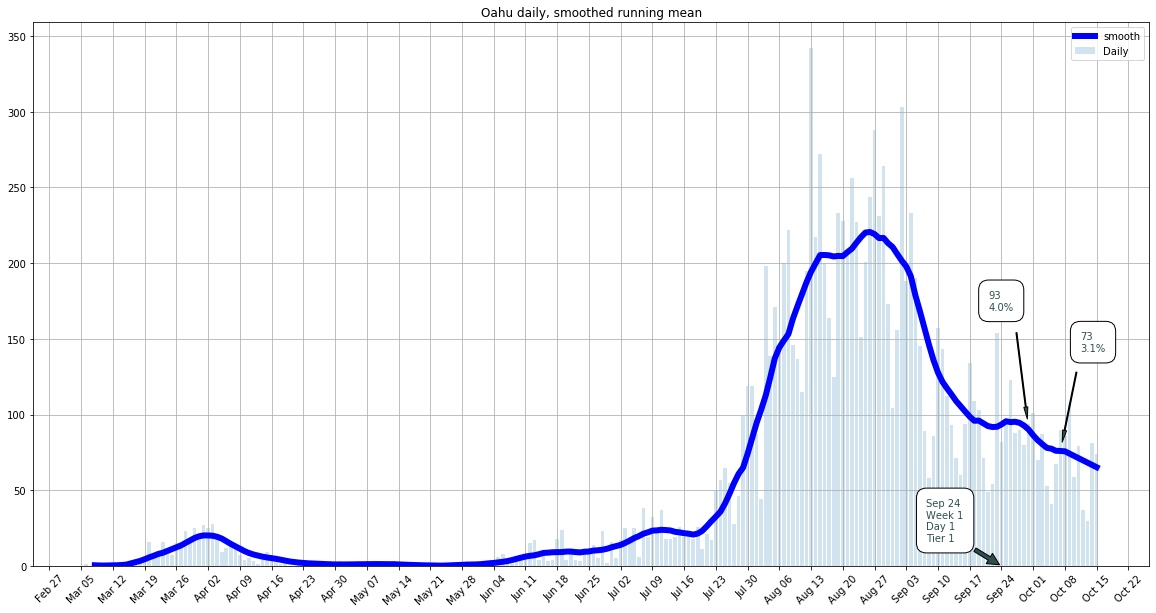

In [10]:
#plot data
fig, ax = plt.subplots(figsize=(20,10))
dSeries = df['Oahu']

ax.bar(df.index, dSeries, label="Daily", alpha=0.2)
#ax.plot(df.index, df['Oahu'].rolling(window=3).mean(), color='red', linewidth=3, label="3 day")
#ax.plot(df.index, dSeries.rolling(window=7).mean(), color='black', linewidth=3, label="7 day")
#ax.plot(df.index, dSeries.rolling(window=14).mean(), color='orange', linewidth=3, label="14 day")
#ax.plot(df.index, dSeries.ewm(span=7).mean(), color='red', linewidth=6, label="ewm")

#ax.plot(df.index,df["combined_mean"], color='green', linewidth=6, label='combined')
ax.plot(df.index,df["smooth"], color='blue', linewidth=6, label='smooth')

#set ticks every week
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.TH))
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
#rotate x axis labels
plt.xticks(rotation=45)
#grid
ax.grid()
ax.legend()

ax.annotate('Sep 24\nWeek 1\nDay 1\nTier 1',(pd.to_datetime('2020-9-24'),0), 
                xytext=(-75,25), textcoords='offset points',
                family='sans-serif', fontsize=10, color='darkslategrey',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=1'),
                arrowprops=dict(facecolor='darkslategrey', shrink=0.05,alpha=1),)

ax.annotate('93\n4.0%',(pd.to_datetime('2020-9-30'),df['smooth']['2020-9-30']), 
                xytext=(-40,120), textcoords='offset points',
                family='sans-serif', fontsize=10, color='darkslategrey',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=1'),
                arrowprops=dict(facecolor='darkslategrey', shrink=0.09,alpha=1,width=1,headwidth=4),)
ax.annotate('73\n3.1%',(pd.to_datetime('2020-10-7'),df['smooth']['2020-10-7']), 
                xytext=(20,100), textcoords='offset points',
                family='sans-serif', fontsize=10, color='darkslategrey',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=1'),
                arrowprops=dict(facecolor='darkslategrey', shrink=0.09,alpha=1,width=1,headwidth=4),)

plt.title('Oahu daily, smoothed running mean');
#fig.canvas.draw()
#fig.savefig('publish/oahu_smoothed');

# Projection  
Simple rate from short term v long term rolling mean

In [11]:
st = 7        # short term
lt = 14       # long term
daysOut = 30  #number of days to project out
dSeries = df["Oahu"]

#R = dSeries.rolling(window=st).mean().tail(3).mean() / dSeries.rolling(window=lt).mean().tail(3).mean()

#set R to average of slope of lt and st series
#R = ((dSeries.rolling(window = st).mean().iloc[-1] / dSeries.rolling(window = st).mean().iloc[-2]) +
#    (dSeries.rolling(window = lt).mean().iloc[-1] / dSeries.rolling(window = lt).mean().iloc[-2])) /2 

#set R to average of the lt and st slopes for the last st periods
dSt = dSeries.rolling(window = st).mean().tail(st)
dLt = dSeries.rolling(window = lt).mean().tail(st)
R = 0.0
Rlt = 0.0
for i in range(len(dSt)-1):
    R = R + (dSt[i+1] / dSt[i])
    Rlt = Rlt +(dLt[i+1] / dLt[i])
    
Rlt = Rlt / (len(dSt)-1)
#average of short term and long term
#R = ((R / (len(dSt)-1)) + Rlt) / 2
#just short term
R = R / (len(dSt)-1)
#just long term
#R= Rlt


#R = dSeries.tail(st).mean()/dSeries.tail(lt).mean()
D = df.index.values[-1]
Starting = dSeries.tail(st).mean()
dates = pd.date_range(D+np.timedelta64(1, "D"), periods=daysOut, freq='D')

#values = [int(round(R*Starting))]
#start from the mid point of the mean. ie the rate to the power half the number of days in the mean.
values = [pow(R,len(dSt)/2)*Starting]
#start projecting the trend onto the mean from the first day of the period -- presumably better for established trend
#values = [pow(R,len(dSt))*Starting]
for i in range(1,daysOut):
  #values.append(int(round(values[i-1]*R)))
  values.append(values[i-1]*R)

#if intergers are better:    
#for i in range(len(values)):
#  values[i] = int(round(values[i]))

data = pd.DataFrame(list(values), index=dates)

data = dSeries.append(data)

In [12]:
R

0.9795711203116189

In [13]:
data["combined_mean"] = (data[0].rolling(window=7, center=True).mean() + data[0].rolling(window=14, center=True).mean())/2
#data["combined_mean"] = (data[0].rolling(window=7).mean() + data[0].rolling(window=14).mean())/2
data["combined_mean"].interpolate(method='slinear',fill_value='extrapolate',inplace=True)

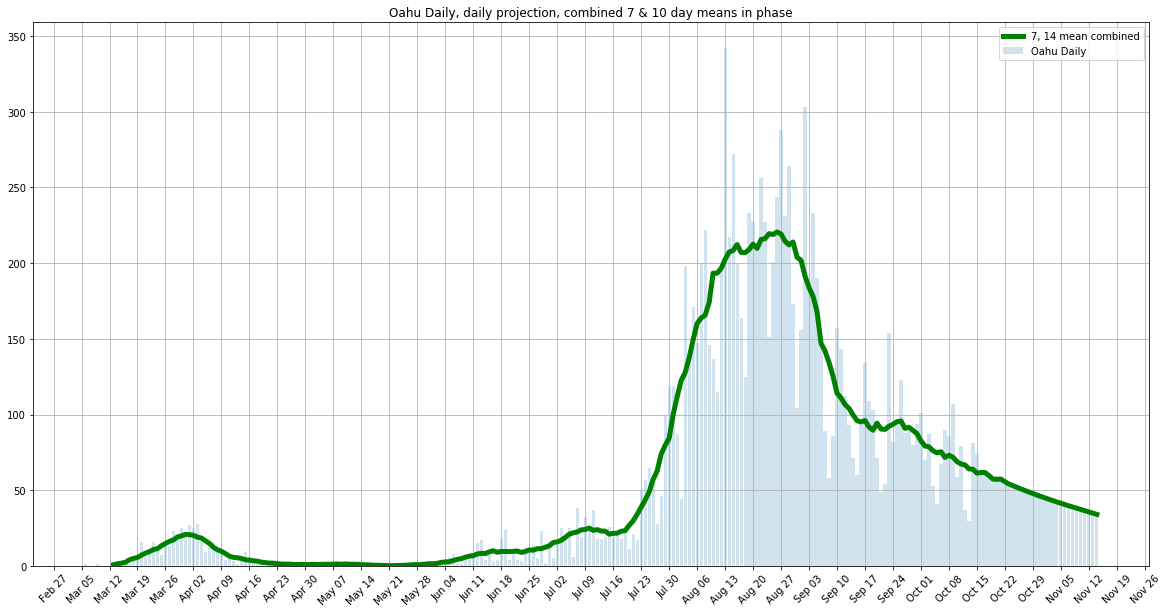

In [14]:
fig, ax = plt.subplots(figsize=(20,10))

ax.bar(data.index, data[0], label='Oahu Daily', alpha = 0.2)
#ax.plot(data.index, data[0].ewm(span=14, adjust = False).mean(), color='k')
#ax.plot(data.index, data[0].rolling(window=7, center=True).mean(), color='black', linewidth=5, label='7 day')
#ax.plot(data.index,data[0].rolling(window=14, center=True).mean(), color='orange', linewidth=5,label='14 day')
ax.plot(data.index,data["combined_mean"], color='green', linewidth=5, label='7, 14 mean combined')

#set ticks every week
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.TH))
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
#rotate x axis labels
plt.xticks(rotation=45)

#grid
ax.grid() 
ax.legend()

plt.title('Oahu Daily, daily projection, combined 7 & 10 day means in phase');

In [15]:
#data["combined_mean"] = (data[0].rolling(window=7, center=True).mean() + data[0].rolling(window=14, center=True).mean())/2

In [16]:
#data["combined_mean"].interpolate(method='slinear',fill_value='extrapolate',inplace=True)

In [17]:
data.tail(31)

,0,combined_mean
2020-10-15,74.000000,61.275441
2020-10-16,62.064712,61.686572
2020-10-17,60.796800,61.722566
2020-10-18,59.554789,59.707411
2020-10-19,58.338151,57.357895
2020-10-20,57.146368,57.243277
2020-10-21,55.978932,57.354006
2020-10-22,54.835345,55.619156
2020-10-23,53.715121,54.110650
2020-10-24,52.617781,53.005230


In [18]:
#calculate rates in a way that makes getting descriptive stats easier
st = 7       # short term

#Back testing: subtract backTestDays from window start
backTestDays = 0 #55

#set R to average of the lt and st slopes for the last st periods
dSt = df["Oahu"].rolling(window = st).mean().tail(st+1) #todo: off by one because of the shift?
#dSt = df["Oahu"].rolling(window = st).mean()[-backTestDays-st:-backTestDays]
dStPr = dSt.shift(-1)
dStRate = dStPr / dSt

dStRate.describe()

count    7.000000
mean     0.993189
std      0.052804
min      0.929524
25%      0.961109
50%      0.981557
75%      1.022064
max      1.074899
Name: Oahu, dtype: float64

In [19]:
rateHtml = '{:.2f}'.format(dStRate.mean())
with open('publish/index.html') as f: #Note: I'm updateing index directly!
    s = Template(f.read())
    
print(s.safe_substitute(rate=rateHtml),file=open('publish/index.html','w'))

In [20]:
rHigh1S = dStRate.mean() + (1 * dStRate.std())
rHigh1S

1.0459929465729427

In [21]:
rHigh2S = dStRate.mean() + (2 * dStRate.std())
rHigh2S

1.0987965349609117

In [22]:
rHigh3S = dStRate.mean() + (3 * dStRate.std())
rHigh3S

1.1516001233488806

In [23]:
rLow1S = dStRate.mean() - (1 *dStRate.std())
rLow1S

0.9403857697970045

In [24]:
rLow2S = dStRate.mean() - (2 *dStRate.std())
rLow2S

0.8875821814090354

In [25]:
rLow3S = dStRate.mean() - (3 *dStRate.std())
rLow3S

0.8347785930210664

In [26]:
rMean = dStRate.mean()
rMean

0.9931893581849736

In [27]:
#get a copy of the data to work with
dfWorking = df["Oahu"]

#calculate a value to start projecting from
#oahuInit = dfWorking.tail(st).mean()

#get dates for projected values
oahuInit = df["Oahu"].rolling(window=7,center=True).mean()[-4-backTestDays]

#Start the confidence from the mean plus minus sigmas
oahuInitHigh1S = oahuInit + df["Oahu"].rolling(7, center=True).std()[-4-backTestDays]
oahuInitHigh2S = oahuInit + 2*(df["Oahu"].rolling(7, center=True).std()[-4-backTestDays])
oahuInitHigh3S = oahuInit + 3*(df["Oahu"].rolling(7, center=True).std()[-4-backTestDays])

oahuInitLow1S = oahuInit - df["Oahu"].rolling(7, center=True).std()[-4-backTestDays]
oahuInitLow2S = oahuInit - 2*(df["Oahu"].rolling(7, center=True).std()[-4-backTestDays])
oahuInitLow3S = oahuInit - 3*(df["Oahu"].rolling(7, center=True).std()[-4-backTestDays])


D = df.index.values[-4-backTestDays]
daysOut = 18
dates = pd.date_range(D+np.timedelta64(1, "D"), periods=daysOut, freq='D')

#create high, mean, low projections from midpoint of mean sample
highValues1S = [pow(rHigh1S,0.5)*oahuInitHigh1S]
highValues2S = [pow(rHigh2S,0.5)*oahuInitHigh2S]
highValues3S = [pow(rHigh3S,0.5)*oahuInitHigh3S]
meanValues = [pow(rMean,0.5)*oahuInit]
lowValues1S = [pow(rLow1S,0.5)*oahuInitLow1S]
lowValues2S = [pow(rLow2S,0.5)*oahuInitLow2S]
lowValues3S = [pow(rLow3S,0.5)*oahuInitLow3S]
for i in range(1,daysOut):
    highValues1S.append(highValues1S[i-1]*rHigh1S)
    highValues2S.append(highValues2S[i-1]*rHigh2S)
    highValues3S.append(highValues3S[i-1]*rHigh3S)
    meanValues.append(meanValues[i-1]*rMean)
    lowValues1S.append(lowValues1S[i-1]*rLow1S)
    lowValues2S.append(lowValues2S[i-1]*rLow2S)
    lowValues3S.append(lowValues3S[i-1]*rLow3S)


dfProjection = pd.DataFrame({"high1S":list(highValues1S),"high2S":list(highValues2S),"high3S":list(highValues3S),
                             "low1S":list(lowValues1S), "low2S":list(lowValues2S),"low3S":list(lowValues3S),
                             "mean":list(meanValues)}, index=dates)

dfProjection = dfWorking.append(dfProjection)


In [28]:
rMean * oahuInit

66.25991861034038

In [29]:
dfProjection["combined_mean"] = (dfProjection[0].rolling(window=7, center=True).mean() + dfProjection[0].rolling(window=14, center=True).mean())/2

Text(0.5, 1.0, 'Oahu Daily, 7 day mean at window midpoints, projected 7 day mean at midpoints and confdence')

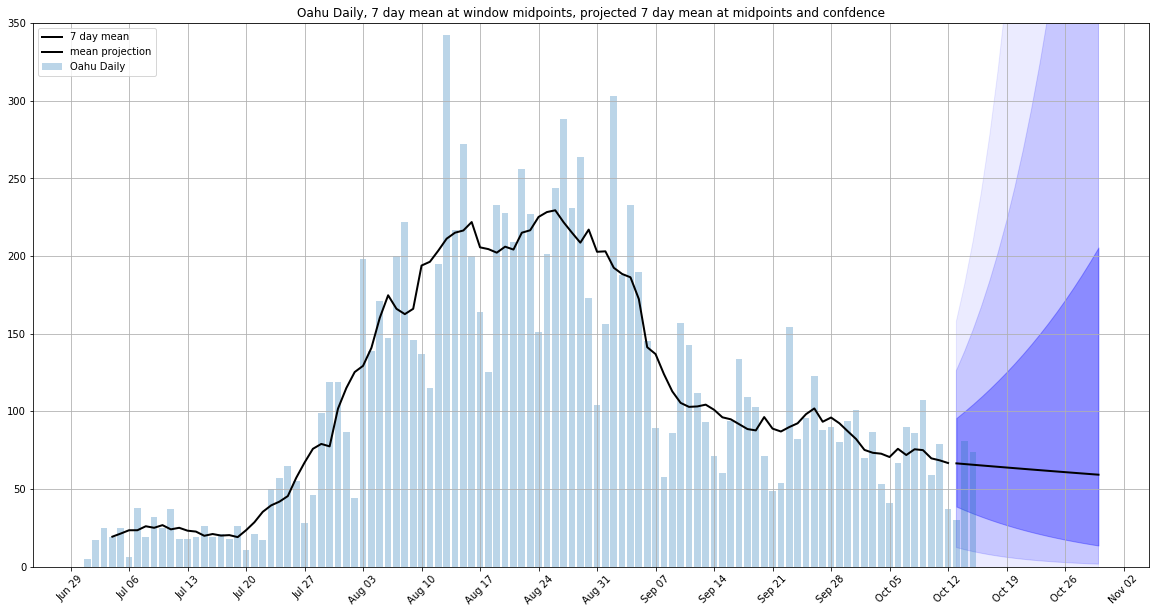

In [30]:
fig, ax = plt.subplots(figsize=(20,10))

plt.ylim(0,350)

dfGraph = dfProjection.loc['2020-7-1' :]

ax.bar(dfGraph.index, dfGraph[0], label='Oahu Daily', alpha = 0.3)
#ax.plot(dfGraph.index,dfGraph["combined_mean"], color='green', linewidth=7, label='7, 10 mean combined')
ax.plot(dfGraph.index, dfGraph[0].rolling(window=7, center=True).mean(), color='black', linewidth=2, label="7 day mean")
ax.plot(dfGraph.index,dfGraph["mean"], color='black', linewidth=2, label='mean projection')
#ax.plot(dfGraph.index,dfGraph["high1S"], color='yellow', linewidth=2, label='plus 3 SD')
#ax.plot(dfGraph.index,dfGraph["low1S"], color='blue', linewidth=2, label='minus 3 SD')
ax.fill_between(dfGraph.index, dfGraph["high1S"], dfGraph["low1S"], color="blue",alpha=0.3)
ax.fill_between(dfGraph.index, dfGraph["high2S"], dfGraph["low2S"], color="blue",alpha=0.15)
ax.fill_between(dfGraph.index, dfGraph["high3S"], dfGraph["low3S"], color="blue",alpha=0.08)


#set ticks every week
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MO))
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
#rotate x axis labels
plt.xticks(rotation=45)

#grid
ax.grid() 
ax.legend()

plt.title('Oahu Daily, 7 day mean at window midpoints, projected 7 day mean at midpoints and confdence')
#plt.show()
#fig.savefig('publish/trend.png');


In [31]:
dfProjection[["low3S","low2S","low1S","mean","high1S"]][-15:-1]

,low3S,low2S,low1S,mean,high1S
2020-10-16,-7.333293,8.590142,32.158369,65.137493,109.496838
2020-10-17,-6.121676,7.624457,30.241273,64.693865,114.532920
2020-10-18,-5.110244,6.767332,28.438462,64.253258,119.800626
2020-10-19,-4.265922,6.006563,26.743125,63.815653,125.310610
2020-10-20,-3.561101,5.331319,25.148855,63.381027,131.074014
2020-10-21,-2.972731,4.731983,23.649625,62.949362,137.102494
2020-10-22,-2.481572,4.200024,22.239771,62.520636,143.408242
2020-10-23,-2.071563,3.727867,20.913964,62.094830,150.004010
2020-10-24,-1.729296,3.308788,19.667194,61.671925,156.903136
2020-10-25,-1.443580,2.936821,18.494749,61.251899,164.119574


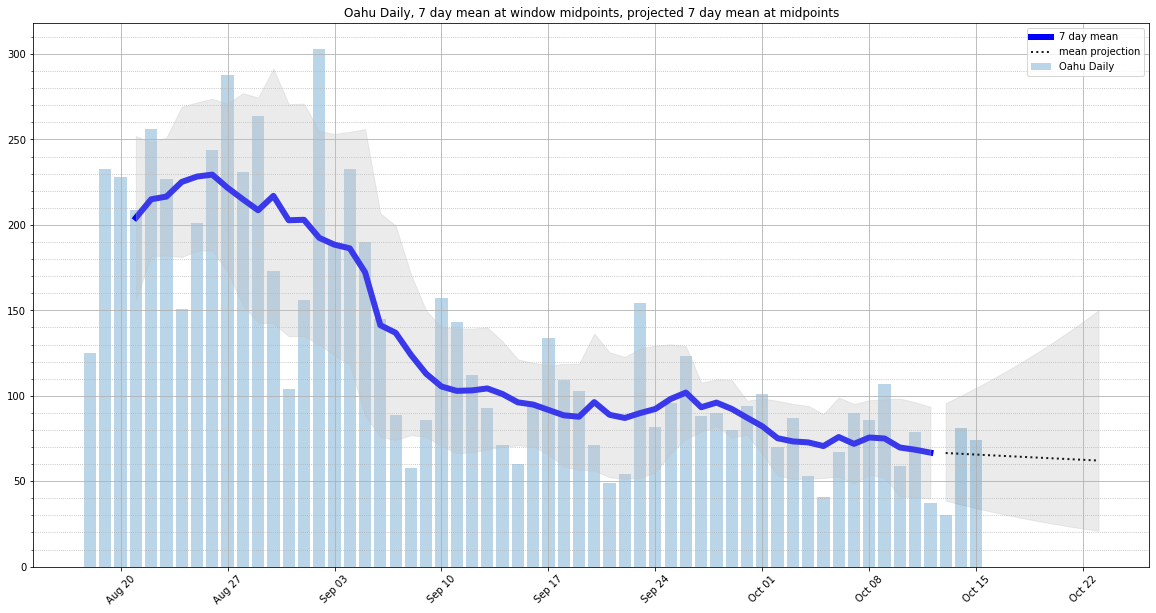

In [32]:
fig, ax = plt.subplots(figsize=(20,10))


dfGraph = dfProjection.iloc[-77:-7]

ax.bar(dfGraph.index, dfGraph[0], label='Oahu Daily', alpha = 0.3)
#ax.plot(dfGraph.index,dfGraph["combined_mean"], color='green', linewidth=7, label='7, 10 mean combined')
ax.fill_between(dfGraph.index,dfGraph[0].rolling(window=7, center=True).mean() + 
        dfGraph[0].rolling(window=7, center=True).std(), 
        dfGraph[0].rolling(window=7, center=True).mean() - 
        dfGraph[0].rolling(window=7, center=True).std(),           
        color='silver',alpha=0.3,zorder=20)

ax.plot(dfGraph.index, dfGraph[0].rolling(window=7, center=True).mean(), color='blue', linewidth=6, label="7 day mean")
ax.plot(dfGraph.index,dfGraph["mean"], color='black', linewidth=2, label='mean projection',linestyle='dotted',alpha=0.9)
#ax.plot(dfGraph.index,dfGraph["high1S"], color='yellow', linewidth=2, label='plus 3 SD')
#ax.plot(dfGraph.index,dfGraph["low1S"], color='blue', linewidth=2, label='minus 3 SD')
ax.fill_between(dfGraph.index, dfGraph["high1S"], dfGraph["low1S"], color="silver",alpha=0.3)
#ax.fill_between(dfGraph.index, dfGraph["high2S"], dfGraph["low2S"], color="blue",alpha=0.08)
#ax.fill_between(dfGraph.index, dfGraph["high3S"], dfGraph["low3S"], color="blue",alpha=0.08)


#set ticks every week
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.TH))
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
#rotate x axis labels
plt.xticks(rotation=45)

# Initialize minor ticks
ax.minorticks_on()

# Now minor ticks exist and are turned on for both axes

# Turn off x-axis minor ticks
ax.xaxis.set_tick_params(which='minor', bottom=False)

#grid
ax.grid() 
ax.grid(which='minor',axis='y',linestyle='dotted')
ax.legend(loc='upper right')

plt.title('Oahu Daily, 7 day mean at window midpoints, projected 7 day mean at midpoints');
#plt.show()
#fig.savefig('publish/trend.png');
